In [1]:
import numpy as np
import pandas as pd
import glob
import os
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import ttest_1samp
import math
from statsmodels.stats.multitest  import fdrcorrection
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.signal import savgol_filter
from scipy import signal
from scipy import stats
import matplotlib.cm as cm
from pygam import LinearGAM, s, f, GAM

In [2]:
cons = glob.glob(os.path.join('../../Dataset/childhood/timeseries/sub-CBPD*timeseries.tsv'))

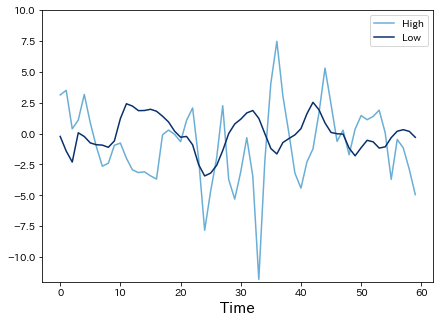

In [4]:
figure = plt.figure(figsize=(7,5))
colors = ['C0', 'C1']
i = 0
for con in cons:
    fsid = os.path.basename(con)[:12]
    if fsid in ['sub-CBPD0154', 'sub-CBPD0169']:
        if i<2:
            con = pd.read_csv(con, sep='\t')
            plt.plot(con.iloc[:60, :400].mean(axis=1), color=cm.Blues((i+1)/2))
            i += 1
plt.ylim([-12,10])
plt.xlabel('Time', size=15)
plt.legend(['High', 'Low'])

<ipython-input-7-d6173634a6a1>:11: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([1e-6, 0])
<ipython-input-7-d6173634a6a1>:11: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([1e-6, 0])


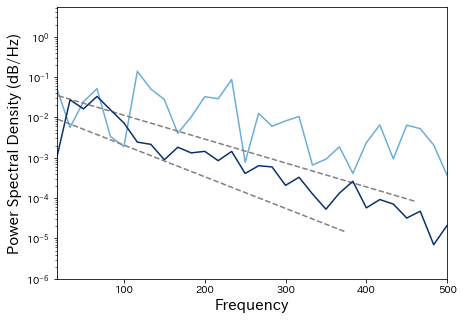

In [7]:
fs = 1000
figure = plt.figure(figsize=(7,5))
i = 0
for con in cons:
    fsid = os.path.basename(con)[:12]
    if fsid in ['sub-CBPD0154', 'sub-CBPD0169']:
        if i<2:
            con = pd.read_csv(con, sep='\t')
            (f, S) = signal.periodogram(con.iloc[:60, :400].mean(axis=1), fs, scaling='density')
            plt.semilogy(f, S, color=cm.Blues((i+1)/2))
            plt.ylim([1e-6, 0])
            plt.xlim([16.66666667, 500])
            plt.xlabel('Frequency', size=15)
            plt.ylabel('Power Spectral Density (dB/Hz)', size=15)
            x = f[1:]
            y = S[1:]
            n = len(x)
            a = ((np.dot(x, y)- y.sum() * x.sum()/n)/ ((x ** 2).sum() - x.sum()**2 / n))
            b = (y.sum() - a * x.sum())/n
            xmax = int(b/np.abs(a))
            plt.semilogy([0, xmax], [b, a * xmax + b], color='gray', linestyle='--')   #x.max()
            i += 1